In [1]:
!pip install tensorflow==2.19.0

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/376.0 MB 4.6 MB/s eta 0:01:22
   ---------------------------------------- 2.1/376.0 MB 4.7 MB/s eta 0:01:20
   ---------------------------------------- 3.1/376.0 MB 4.6 MB/s eta 0:01:21
   ---------------------------------------- 3.9/376.0 MB 4.5 MB/s eta 0:01:23
    --------------------------------------- 5.0/376.0 MB 4.5 MB/s eta 0:01:23
    --------------------------------------- 6.3/376.0 MB 4.8 MB/s eta 0:01:17
    --------------------------------------- 7.3/376.0 MB 4.9 MB/s eta 0:01:15
    --------------------------------------- 8.4/376.0 MB 4.9 MB/s eta 0:01:16
    --------------------------------------- 9.2/376.0 MB 4.8 MB/s eta 0:01:18
   - -------------------------------------- 9.7/376.0 MB 4.7 MB/s eta 0:01:19
   - -------------------------------------- 10.5/376.0 MB 4.5 MB/s eta 0:01:23

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


$IMPORTS$ $AND$ $SETUPS$

In [20]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from PIL import Image
from collections import Counter
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

$DATA$ 

In [21]:
import tarfile
images_tar = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/images.tar.gz"
annotations_tar = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/annotations.tar.gz"

tarfile.open(images_tar, "r:gz").extractall(path = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/images")
tarfile.open(annotations_tar, "r:gz").extractall(path = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/annotations") 

C:\Users\HP\AppData\Local\Temp\ipykernel_16156\3682638650.py:5: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tarfile.open(images_tar, "r:gz").extractall(path = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/images")


KeyboardInterrupt: 

In [52]:
data_dir = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/images/images"
annotations_file = "C:/Users/HP/Desktop/ML_DS/CNN/data/oxford-iiit-pet/annotations/annotations/list.txt"

with open(annotations_file, 'r') as f:
    lines = f.readlines()[6:]

images_data = []
for lines in tqdm(lines):
    parts = lines.split()
    images_name = parts[0]+".jpg"
    breed_label = parts[0].rsplit("_",1)[0].lower()
    first_char = parts[0][0]
    species = "cat" if first_char.isupper() else "dog"
    images_data.append((images_name,breed_label,species))

df = pd.DataFrame(images_data, columns=["filename", "breed", "species"])

print(df.head())

100%|██████████| 7349/7349 [00:00<00:00, 497939.36it/s]

             filename       breed species
0  Abyssinian_100.jpg  abyssinian     cat
1  Abyssinian_101.jpg  abyssinian     cat
2  Abyssinian_102.jpg  abyssinian     cat
3  Abyssinian_103.jpg  abyssinian     cat
4  Abyssinian_104.jpg  abyssinian     cat


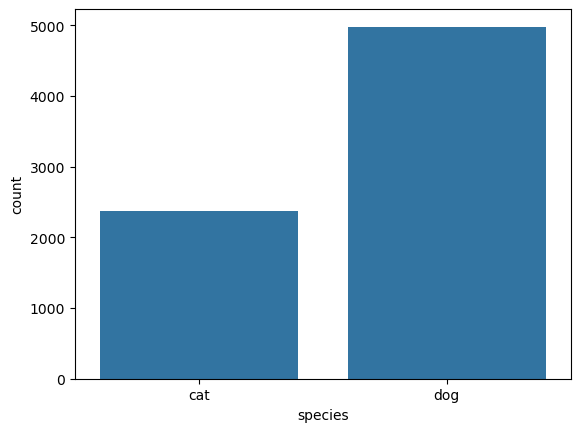

In [53]:
sns.countplot(data=df,x="species")
plt.show()

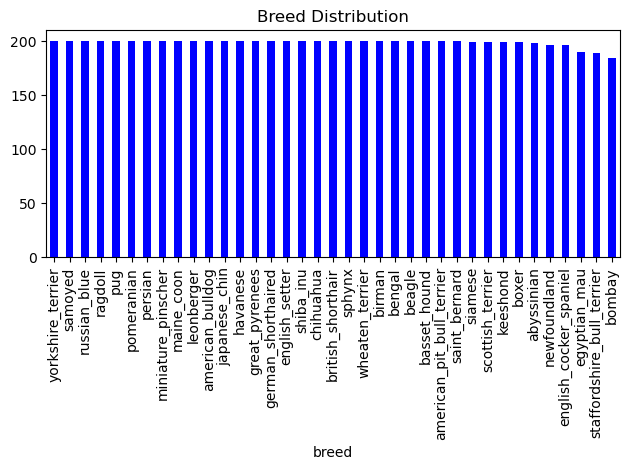

In [54]:
df['breed'].value_counts().plot(kind='bar', color='blue')
plt.title("Breed Distribution")
plt.tight_layout()
plt.savefig("breed_distribution.png")
plt.show()

100%|██████████| 7349/7349 [00:03<00:00, 2218.38it/s]


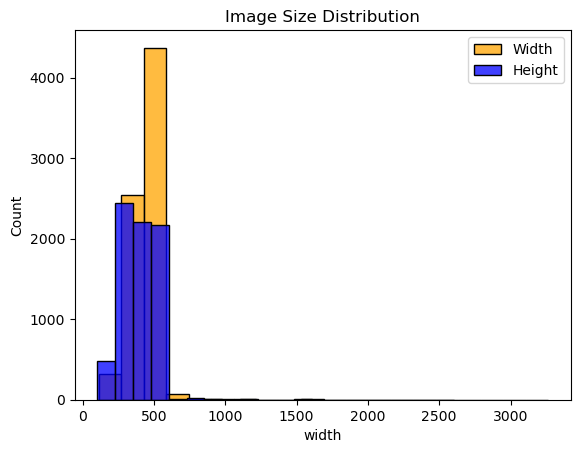

In [55]:
img_shapes = []
for filename in tqdm(df['filename']):
    if filename == "beagle_80.jpg" : 
        continue  #this does not exist in the dataset
    img_path = os.path.join(data_dir, filename)
    img = Image.open(img_path)
    img_shapes.append(img.size)

shape_df = pd.DataFrame(img_shapes, columns=['width', 'height'])
sns.histplot(shape_df['width'], bins=20, color='orange', label='Width')
sns.histplot(shape_df['height'], bins=20, color='blue', label='Height')
plt.title("Image Size Distribution")
plt.legend()
plt.savefig("image_size_hist.png")
plt.show()

100%|██████████| 7349/7349 [00:49<00:00, 149.90it/s]


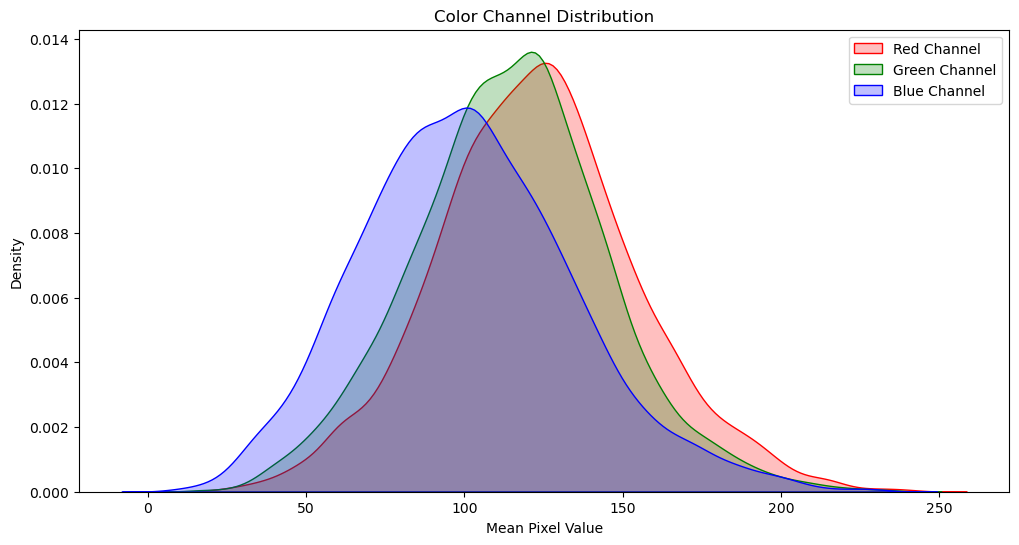

In [61]:
r_means = []
g_means = []
b_means = []
for filename in tqdm(df['filename']):
    if filename == "beagle_80.jpg" : 
        continue  #this does not exist in the dataset
    img_path = os.path.join(data_dir, filename)
    img = Image.open(img_path)
    img_array = np.array(img)
    r_means.append(np.mean(img_array[:,:,0]))
    g_means.append(np.mean(img_array[:,:,1]))
    b_means.append(np.mean(img_array[:,:,2]))
r_means = np.array(r_means)
g_means = np.array(g_means)
b_means = np.array(b_means)

plt.figure(figsize=(12, 6))
sns.kdeplot(r_means, color='red', label='Red Channel', fill=True)
sns.kdeplot(g_means, color='green', label='Green Channel', fill=True)       
sns.kdeplot(b_means, color='blue', label='Blue Channel', fill=True)
plt.title("Color Channel Distribution")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.savefig("color_channel_distribution.png")
plt.show()